<a href="https://colab.research.google.com/github/Nevil-Dhinoja/ML-Nevil/blob/main/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

# Load the datasets
train = pd.read_csv('sample_data/train.csv')
test = pd.read_csv('sample_data/test.csv')
sample_submission = pd.read_csv('sample_data/sample_submission.csv')

# Display basic information
print("Train Data:")
print(train.head())
print("\nTest Data:")
print(test.head())
print("\nSample Submission:")
print(sample_submission.head())

Train Data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008 

In [3]:
# Check for missing values
print("Missing Values in Train:")
print(train.isnull().sum())
print("\nMissing Values in Test:")
print(test.isnull().sum())

# Check data types
print("\nTrain Info:")
print(train.info())

# Descriptive statistics
print("\nTrain Description:")
print(train.describe())

Missing Values in Train:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Missing Values in Test:
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Stree

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

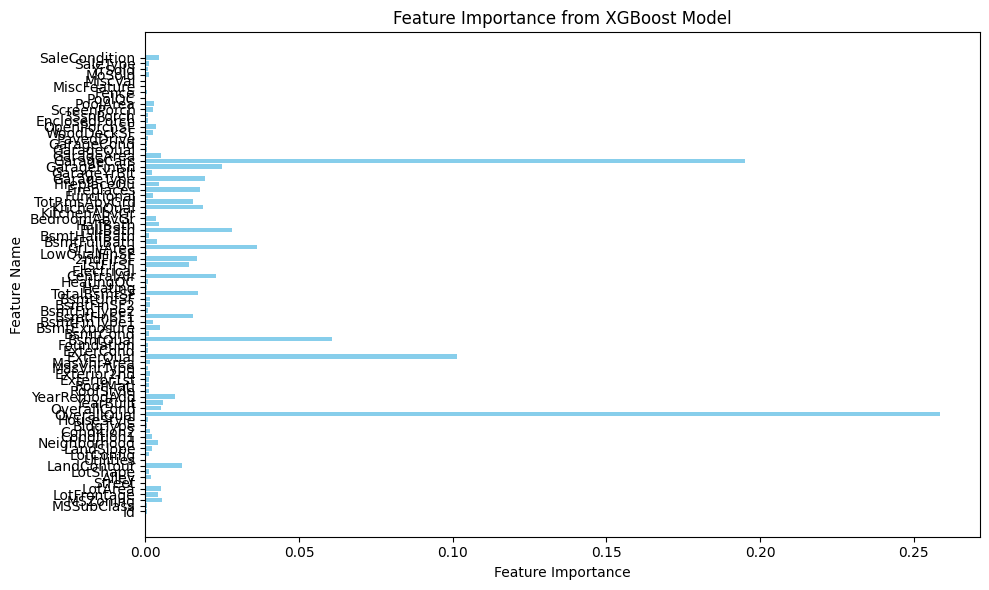

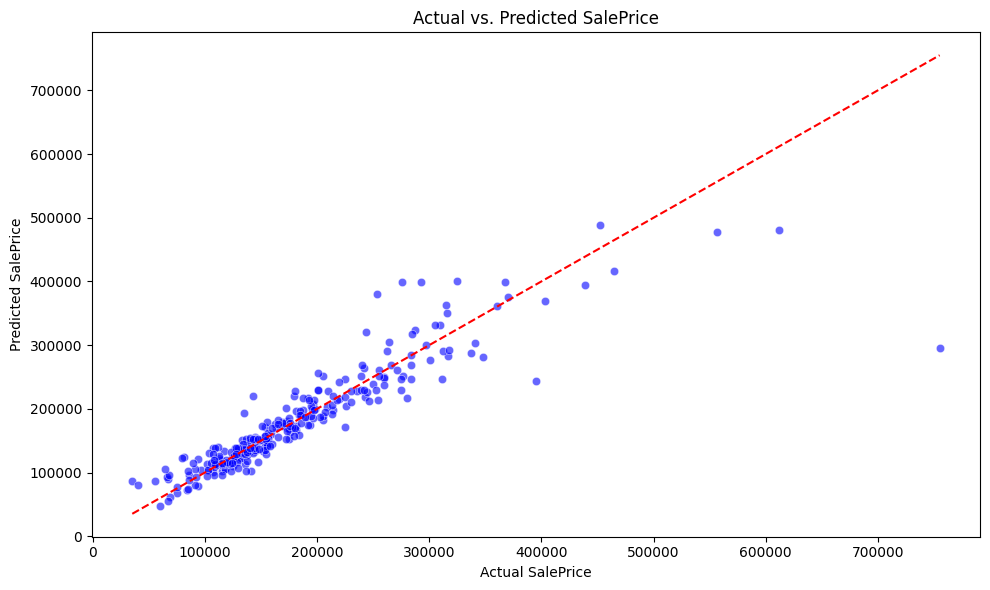

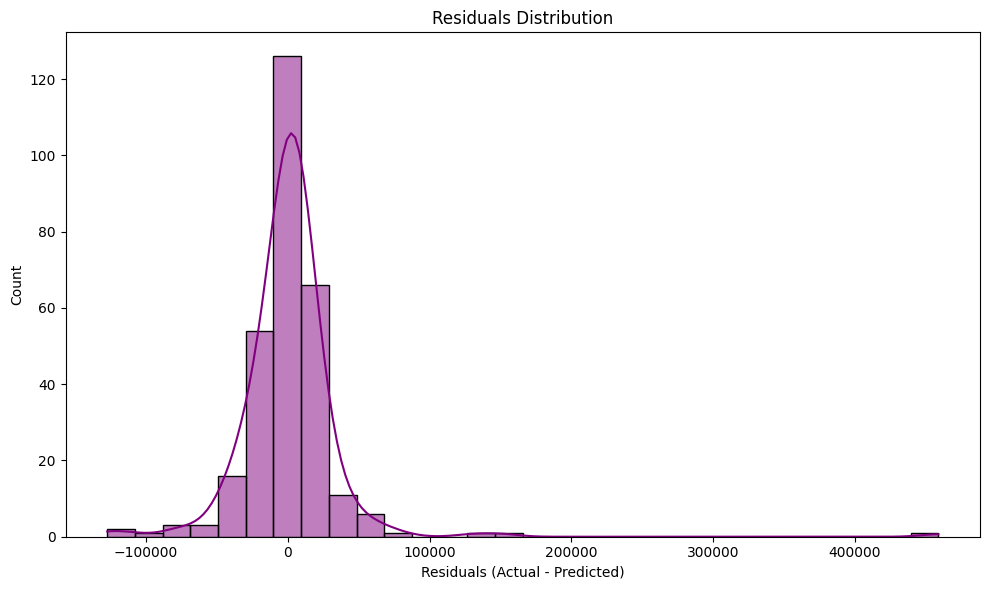

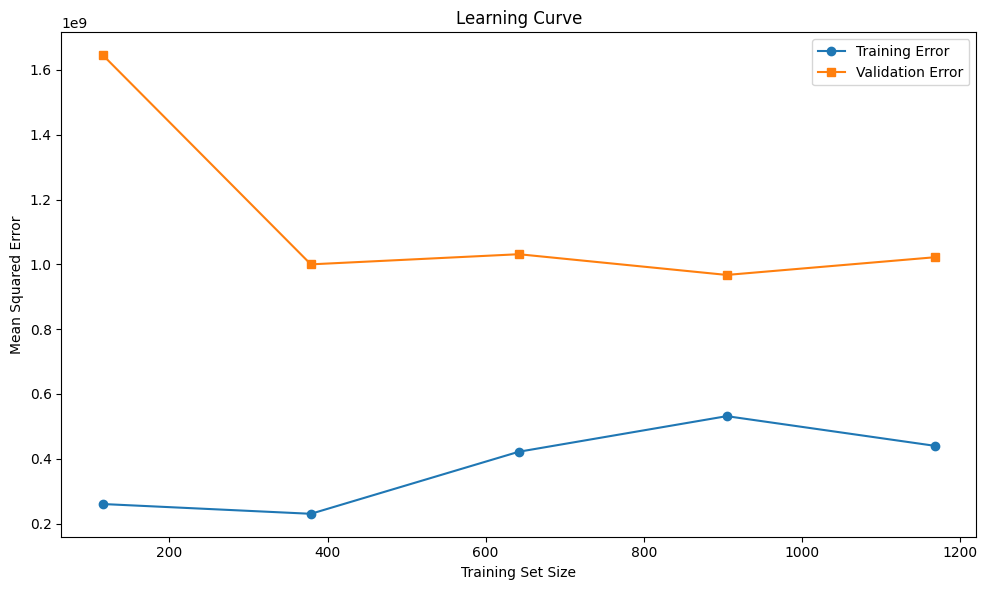

In [29]:
# Install necessary libraries
!pip install catboost dask[dataframe]
!pip install catboost dask[dataframe] matplotlib seaborn

# Importing required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')


# Load the dataset
train = pd.read_csv('sample_data/train.csv')
test = pd.read_csv('sample_data/test.csv')

numeric_cols = train.select_dtypes(include=np.number).columns
numeric_cols_test = numeric_cols[numeric_cols != 'SalePrice']

train[numeric_cols] = train[numeric_cols].fillna(train[numeric_cols].median())
test[numeric_cols_test] = test[numeric_cols_test].fillna(test[numeric_cols_test].median())

categorical_cols = train.select_dtypes(include=['object']).columns
train[categorical_cols] = train[categorical_cols].fillna('missing')
test[categorical_cols] = test[categorical_cols].fillna('missing')

combined = pd.concat([train[categorical_cols], test[categorical_cols]])

for col in categorical_cols:
    encoder = LabelEncoder()
    combined[col] = encoder.fit_transform(combined[col].astype(str))

train[categorical_cols] = combined.iloc[:len(train)][categorical_cols]
test[categorical_cols] = combined.iloc[len(train):][categorical_cols]

# Separate features and target variable
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']
X_test = test.drop('SalePrice', axis=1, errors='ignore')

# Train-Test Split for cross-validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define models
xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgb_model = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

try:
    from catboost import CatBoostRegressor
    cat_model = CatBoostRegressor(
        iterations=500,
        learning_rate=0.05,
        depth=4,
        verbose=0,
        random_state=42
    )
except ModuleNotFoundError:
    cat_model = None
    print("CatBoost is not installed, using only XGBoost and LightGBM.")

if cat_model is not None:
    stacking_model = StackingRegressor(
        estimators=[
            ('xgb', xgb_model),
            ('lgb', lgb_model),
            ('cat', cat_model),
        ],
        final_estimator=RandomForestRegressor(n_estimators=200, random_state=42)
    )
else:
    stacking_model = StackingRegressor(
        estimators=[
            ('xgb', xgb_model),
            ('lgb', lgb_model),
        ],
        final_estimator=RandomForestRegressor(n_estimators=200, random_state=42)
    )

# Train the stacking model
stacking_model.fit(X_train_split, y_train_split)

# Predict on validation set
y_val_pred = stacking_model.predict(X_val_split)
mse = mean_squared_error(y_val_split, y_val_pred)
print(f'Mean Squared Error on Validation Set: {mse}')

# Train the final model on full training data
stacking_model.fit(X_train, y_train)

# Predict on test data
y_test_pred = stacking_model.predict(X_test)

# Create a submission file
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_test_pred})
submission.to_csv('submission.csv', index=False)

print("Model training complete and submission file created.")


# Feature Importance Visualization for XGBoost
xgb_model.fit(X_train, y_train)  # Ensure XGBoost is trained on full data
xgb_importance = xgb_model.feature_importances_

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, xgb_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance from XGBoost Model')
plt.tight_layout()
plt.show()

# Actual vs. Predicted Plot for Validation Set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val_split, y=y_val_pred, color='blue', alpha=0.6)
plt.plot([y_val_split.min(), y_val_split.max()], [y_val_split.min(), y_val_split.max()], color='red', linestyle='--')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice')
plt.tight_layout()
plt.show()

residuals = y_val_split - y_val_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.xlabel('Residuals (Actual - Predicted)')
plt.title('Residuals Distribution')
plt.tight_layout()
plt.show()

from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    stacking_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

train_scores_mean = -np.mean(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation Error', marker='s')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.tight_layout()
plt.show()